# Projeto de um Amplificador usando Estratégias Evolutivas
___

**Disciplina:** Automação Inteligente

**Autor:** Miguel Marques Ferreira

**GitHub:** https://github.com/Miguel-mmf

## Bibliotecas

In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Unit import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Problema 1
___

Para o circuito amplificador da figura abaixo, determine:
* Tensões nos nós (1), (2), (3), (4) e (5);
* O ganho do amplificador;
* Implemente um Algoritmo baseado em Estratégias Evolutivas (EEs) para determinar os valores dos componentes R1, R2, RC, RE, C e CE, para que o circuito amplificador tenha um ganho de 2000;
* Obtenha como resultado a melhor solução dos componentes [R1, R2, RC, RE, C e CE] que atendam o ganho igual a 2000;
* Obtenha a figura do comportamento do FITNESS em função do número de gerações.

![circuito 1](circuito1.png)

In [2]:
libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

2024-04-20 16:42:43,495 - PySpice.Doc.ExampleTools.find_libraries - INFO - SPICE library path is /home/enacom/miniconda3/envs/ava03/lib/python3.12/libraries


### Constantes

In [3]:
Vin = 22@u_V
Vs = 1@u_mV
f = 10@u_kHz
R1 = 56@u_kΩ
R2 = 8.2@u_kΩ
RC = 6.8@u_kΩ
RE = 1.5@u_kΩ
C = 10@u_uF
CE = 20@u_uF

In [4]:
circuit = Circuit('Exemplo 1')

circuit.V('input',3, circuit.gnd, Vin)
circuit.AcLine('VS',1,circuit.gnd, rms_voltage=Vs, frequency=f)

circuit.C(1,1,2,C)
circuit.R(2, 2, circuit.gnd, R2)
circuit.R(1, 3, 2, R1)
circuit.R(3,3,4,RC)
circuit.R(4,5,circuit.gnd, RE)
circuit.C(2,5,circuit.gnd, CE)
circuit.BJT(1, 4, 2, 5, model='generic')

circuit.model('generic', 'npn')

<class 'PySpice.Spice.Netlist.DeviceModel'> generic

In [5]:
print(circuit)

.title Exemplo 1
Vinput 3 0 22V
VVS 1 0 DC 0V AC 1V SIN(0V 1.4142135623730951mV 10kHz 0s 0Hz)
C1 1 2 10uF
R2 2 0 8.2kOhm
R1 3 2 56kOhm
R3 3 4 6.8kOhm
R4 5 0 1.5kOhm
C2 5 0 20uF
Q1 4 2 5 generic
.model generic npn ()



In [6]:
circuit.node_names

dict_keys(['0', '3', '1', '2', '4', '5'])

In [7]:
circuit.element_names

odict_keys(['Vinput', 'VVS', 'C1', 'R2', 'R1', 'R3', 'R4', 'C2', 'Q1'])

In [8]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

2024-04-20 16:42:47,944 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - Note: can't find the initialization file spinit.
2024-04-20 16:42:47,948 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._init_ngspice - WARNING - Unsupported Ngspice version 40


In [9]:
analysis.branches

{'vinput': WaveForm vinput [-0.00162667]@A, 'vvs': WaveForm vvs [0.]@A}

In [10]:
analysis.vinput

WaveForm vinput [-0.00162667]@A

In [11]:
analysis.vvs

WaveForm vvs [0.]@A

In [12]:
node_values = dict()
for node in analysis.nodes.values():
    node_values[str(node)] = float(node)
    print('Node {}: {:4.1f} V'.format(str(node), float(node)))
i = 0
for node in analysis.nodes.values():
    if i==0:
        fit = float(node)
    i+=1
print(fit)

Node 5:  1.9 V
Node 4: 13.3 V
Node 2:  2.7 V
Node 1:  0.0 V
Node 3: 22.0 V
1.9427642149766235


In [13]:
node_values

{'5': 1.9427642149766235,
 '4': 13.280002046501643,
 '2': 2.7182467489017657,
 '1': 0.0,
 '3': 22.0}

### Simulacção no tempo

In [14]:
aux = simulator.transient(step_time=1@u_us, end_time=1@u_ms)

In [18]:
# for i in [1, 2, 3, 4, 5]:
#     figure, ax = plt.subplots(figsize=(12, 4))
#     ax.plot(aux.time, aux[str(i)], label='Tensão no ponto {}'.format(i), linewidth=3)
#     ax.set_xlabel('Tempo (s)')
#     ax.set_ylabel('Tensão (V)')
#     ax.legend()
#     ax.grid()

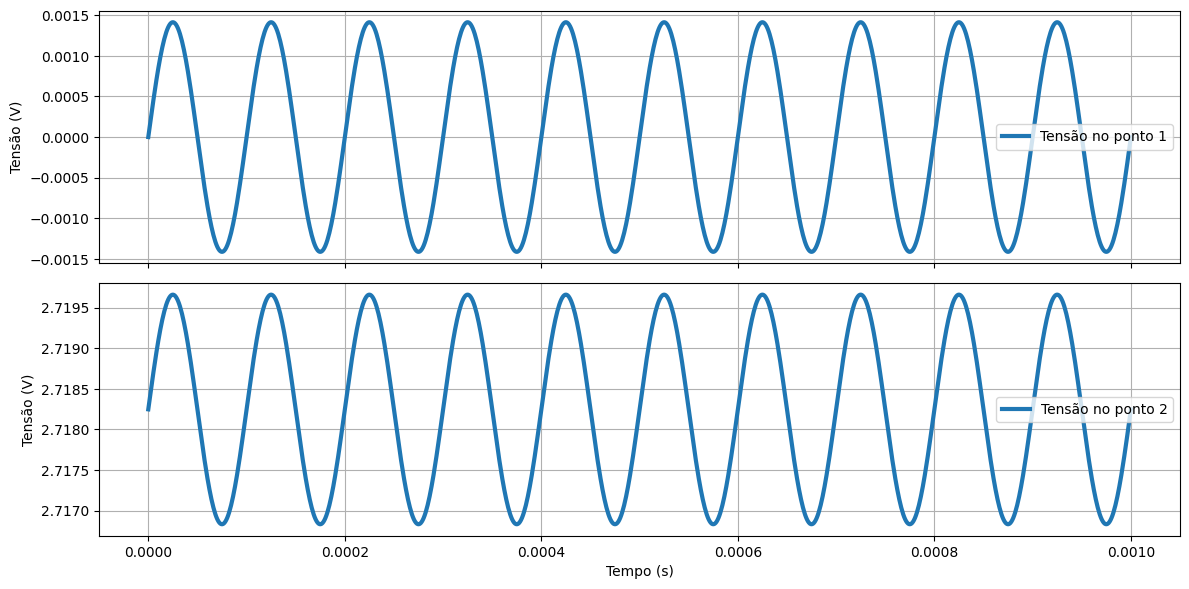

In [22]:
figure, axs = plt.subplots(2,1, figsize=(12, 6), sharex=True)
axs[0].plot(aux.time, aux['1'], label='Tensão no ponto 1', linewidth=3)
axs[1].plot(aux.time, aux['2'], label='Tensão no ponto 2', linewidth=3)

axs[0].set_ylabel('Tensão (V)')
axs[1].set_ylabel('Tensão (V)')
axs[1].set_xlabel('Tempo (s)')
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.savefig(
    './images/tensoes_12.png',
    dpi=300,
)
plt.savefig(
    './images/tensoes_12.pdf',
    dpi=300,
)

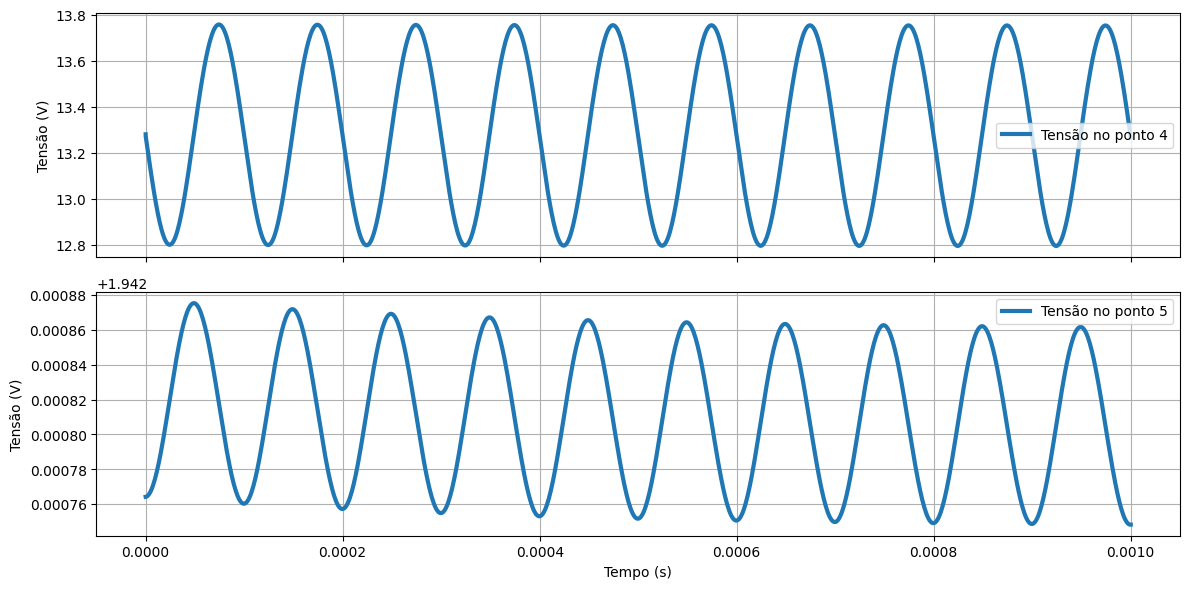

In [15]:
figure, axs = plt.subplots(2,1, figsize=(12, 6), sharex=True)
axs[0].plot(aux.time, aux['4'], label='Tensão no ponto 4', linewidth=3)
axs[1].plot(aux.time, aux['5'], label='Tensão no ponto 5', linewidth=3)

axs[0].set_ylabel('Tensão (V)')
axs[1].set_ylabel('Tensão (V)')
axs[1].set_xlabel('Tempo (s)')
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.savefig(
    './images/tensoes_45.png',
    dpi=300,
)
plt.savefig(
    './images/tensoes_45.pdf',
    dpi=300,
)

### Ganho do Amplificador

In [16]:
from src import calc_gain_circuit

In [21]:
calc_gain_circuit(
    Vin=22,
    Vs=1,
    f=10,
    R1=56,
    R2=8.2,
    RC=6.8,
    RE=1.5,
    C=10,
    CE=20,
    type='DC'
)

1943.0

In [22]:
max_saida = float(max(aux['5']))
max_entrada = float(max(aux['1']))
print(f'Max de entrada: {max_entrada} V')
print(f'Max de saída: {max_saida} V')

Max de entrada: 0.0014139947108366255 V
Max de saída: 1.9428753428089234 V


In [23]:
print(f'Ganho do amplificador: {round(max_saida/max_entrada, 2)}')

Ganho do amplificador: 1374.03
